In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

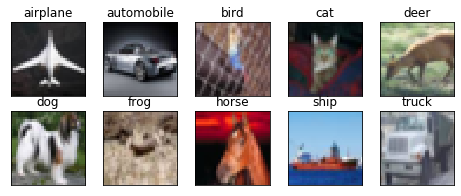

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 9s 24ms/step - loss: 1.8533 - acc: 0.2925 - val_loss: 1.5570 - val_acc: 0.4465
Epoch 2/50
390/390 [==============================] - 9s 22ms/step - loss: 1.3514 - acc: 0.5106 - val_loss: 1.1455 - val_acc: 0.5789
Epoch 3/50
390/390 [==============================] - 9s 22ms/step - loss: 1.1324 - acc: 0.5944 - val_loss: 0.9581 - val_acc: 0.6607
Epoch 4/50
390/390 [==============================] - 9s 22ms/step - loss: 0.9912 - acc: 0.6555 - val_loss: 0.9482 - val_acc: 0.6726
Epoch 5/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8908 - acc: 0.6908 - val_loss: 0.7731 - val_acc: 0.7396
Epoch 6/50
390/390 [==============================] - 9s 22ms/step - loss: 0.8100 - acc: 0.7212 - val_loss: 0.7285 - val_acc: 0.7499
Epoch 7/50
390/390 [==============================] - 9s 22ms/step - loss: 0.7549 - acc: 0.7429 - val_loss: 0.7007 - val_acc: 0.7585
Epoch 8/50
390/390 [==============================] - 9s 22ms/step - 

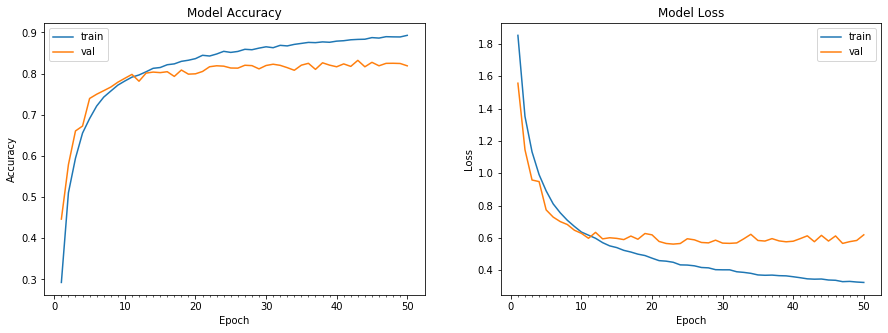

Accuracy on test data is: 81.89


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
score = model.evaluate(test_features, test_labels, verbose=0)
print(score)

[0.6189147124290466, 0.8189]


MY MODEL


In [0]:
# Define the model
mymodel = Sequential()
mymodel.add(SeparableConv2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))  #32  #RF=3
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(48, 3, 3))   #30  #RF=5
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(MaxPooling2D(pool_size=(2, 2)))   #15    #RF=6
mymodel.add(Dropout(0.25))

mymodel.add(SeparableConv2D(96, 3, 3, border_mode='same'))   #15   #RF=10
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(96, 3, 3))    #13   #RF=14
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(MaxPooling2D(pool_size=(2, 2)))   #6   #RF=18
mymodel.add(Dropout(0.25))

mymodel.add(SeparableConv2D(192, 3, 3, border_mode='same'))   #6   #RF=26
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(192, 3, 3))   #4    #RF=34
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(10, 4, 4))   #1      #RF=46
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())

mymodel.add(Flatten())
mymodel.add(Activation('softmax'))
# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

In [0]:
mymodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_10 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_11 (Separab (None, 30, 30, 48)        2784      
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 48)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  


Epoch 1/50
390/390 [==============================] - 21s 55ms/step - loss: 1.4250 - acc: 0.4920 - val_loss: 2.2883 - val_acc: 0.4764
Epoch 2/50
390/390 [==============================] - 19s 49ms/step - loss: 1.0303 - acc: 0.6364 - val_loss: 1.3509 - val_acc: 0.6223
Epoch 3/50
390/390 [==============================] - 19s 48ms/step - loss: 0.8939 - acc: 0.6849 - val_loss: 1.0775 - val_acc: 0.6705
Epoch 4/50
390/390 [==============================] - 19s 48ms/step - loss: 0.8155 - acc: 0.7147 - val_loss: 0.9604 - val_acc: 0.6949
Epoch 5/50
390/390 [==============================] - 19s 48ms/step - loss: 0.7651 - acc: 0.7314 - val_loss: 0.8792 - val_acc: 0.6992
Epoch 6/50
390/390 [==============================] - 19s 48ms/step - loss: 0.7229 - acc: 0.7466 - val_loss: 0.8254 - val_acc: 0.7292
Epoch 7/50
390/390 [==============================] - 19s 48ms/step - loss: 0.6889 - acc: 0.7586 - val_loss: 0.7479 - val_acc: 0.7522
Epoch 8/50
390/390 [==============================] - 19s 48ms

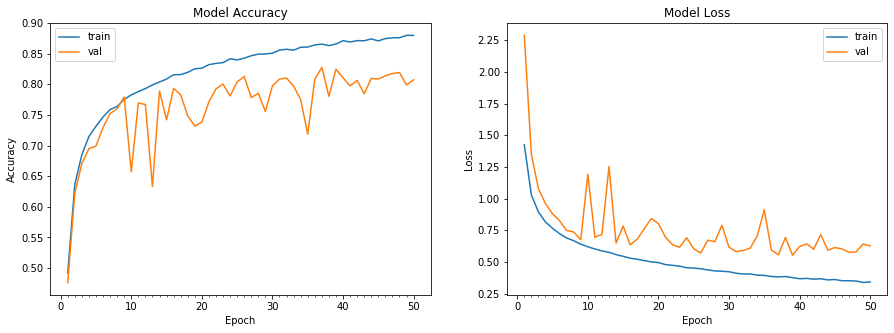

Accuracy on test data is: 80.73


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

mymodel.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.03), metrics=['accuracy'])
# train the model
start = time.time()
# Train the model
my_model_info = mymodel.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(my_model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, mymodel))